In [ ]:
-- First Query the Log In time 

select user_id, DATE(timestamp) date_load, MAX(timestamp) login_time
from facebook_web_log
where action = 'page_load'
group by user_id, DATE(timestamp)

SyntaxError: invalid syntax (1321161801.py, line 1)

In [2]:
-- Now Query the Log Out time

select user_id, DATE(timestamp) date_exit, MIN(timestamp) logout_time
from facebook_web_log
where action = 'page_exit'
group by user_id, DATE(timestamp)

SyntaxError: invalid syntax (3522980539.py, line 1)

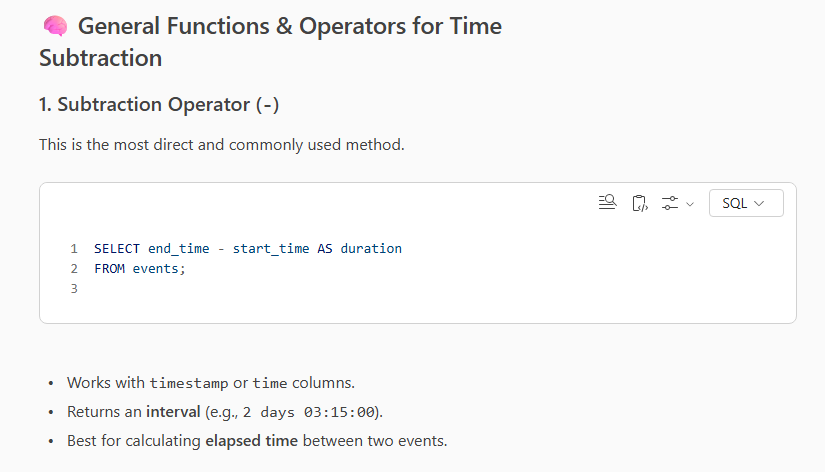

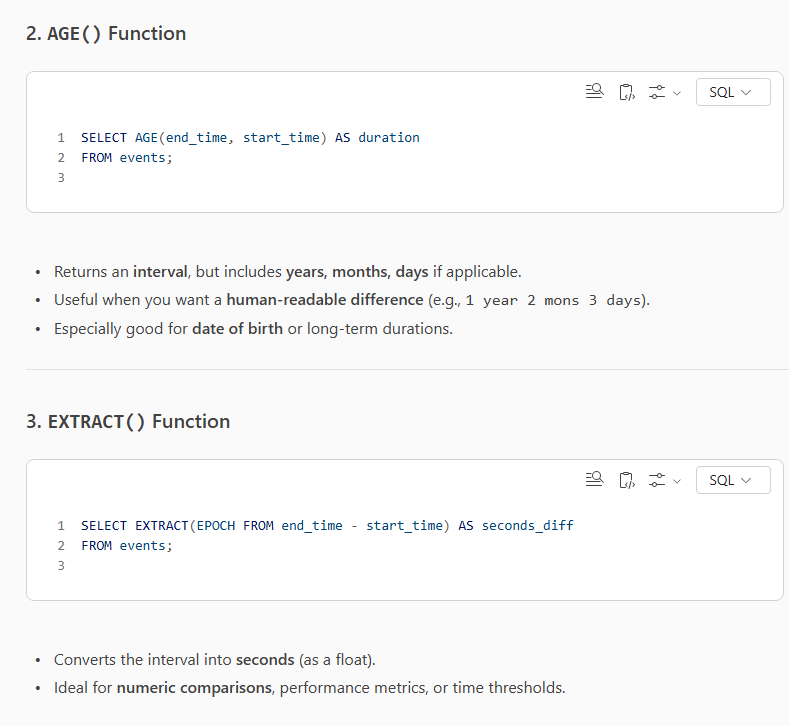

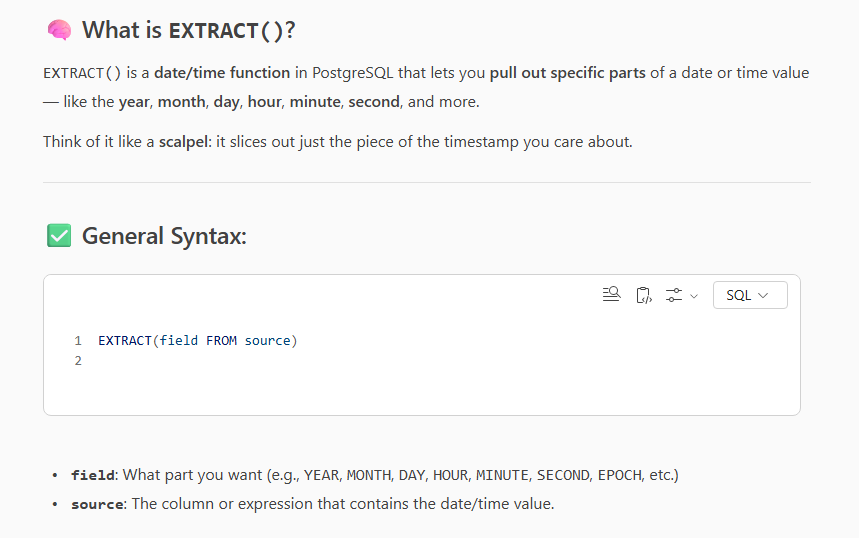

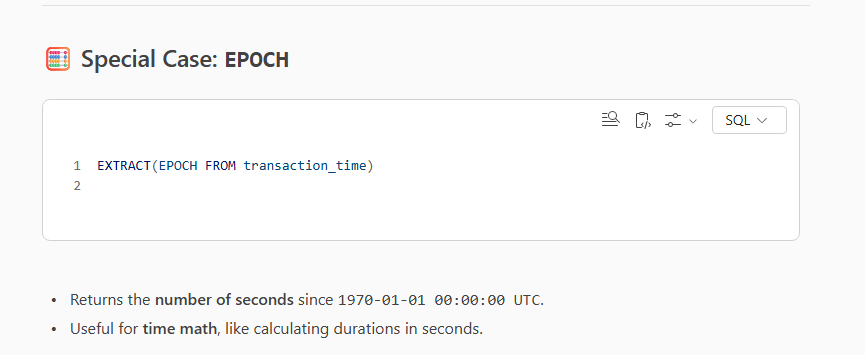

In [3]:
-- Now I can get the difference between log out and log in sessions

WITH user_load AS (
    select user_id, DATE(timestamp) date_load, MAX(timestamp) login_time
    from facebook_web_log
    where action = 'page_load'
    group by user_id, DATE(timestamp)
),
user_exit AS (
    select user_id, DATE(timestamp) date_exit, MIN(timestamp) logout_time
    from facebook_web_log
    where action = 'page_exit'
    group by user_id, DATE(timestamp)
)
SELECT ul.user_id, ul.date_load, ul.login_time , ue.date_exit, ue.logout_time, EXTRACT (EPOCH from ue.logout_time - ul.login_time) log_time
FROM user_exit ue JOIN user_load ul
    ON ue.user_id = ul.user_id
    AND ue.date_exit = ul.date_load


SyntaxError: invalid syntax (3298864355.py, line 1)

In [4]:
-- Finally, get the average time for each user sessions
WITH user_load AS (
    select user_id, DATE(timestamp) date_load, MAX(timestamp) login_time
    from facebook_web_log
    where action = 'page_load'
    group by user_id, DATE(timestamp)
),
user_exit AS (
    select user_id, DATE(timestamp) date_exit, MIN(timestamp) logout_time
    from facebook_web_log
    where action = 'page_exit'
    group by user_id, DATE(timestamp)
),
session_time AS (
    SELECT ul.user_id, ul.date_load, ul.login_time , ue.date_exit, ue.logout_time, EXTRACT (EPOCH from ue.logout_time - ul.login_time) log_time
    FROM user_exit ue JOIN user_load ul
        ON ue.user_id = ul.user_id
        AND ue.date_exit = ul.date_load
)
SELECT user_id, AVG(log_time)
FROM session_time
group by user_id

SyntaxError: invalid syntax (2987050114.py, line 1)